## Laboratorio 4
### Nombre: Aramayo Valdez Joaquin.
### CU: 35-5344.
### link GitHub:
### link Dataset: https://www.kaggle.com/datasets/deepaksaipendyala/credit-score-classification-processed

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
# from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# importamos pandas
import pandas as pd


### Hacemos la carga del dataset a utilizar.

In [6]:
data = pd.read_csv('credit_score.csv')
data

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
1,2,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
2,3,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
3,4,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2
4,5,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,99991,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,...,0,3571.70,37.140784,75,2,60.964772,34.662906,0,337.362988,1
79801,99993,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,29.135447,376,1,58638.000000,180.733095,4,400.104466,1
79802,99997,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,0
79803,99998,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,...,1,502.38,33.638208,381,1,35.104023,251.672582,3,319.164979,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79805 entries, 0 to 79804
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                79805 non-null  int64  
 1   Month                     79805 non-null  int64  
 2   Age                       79805 non-null  float64
 3   Occupation                79805 non-null  int64  
 4   Annual_Income             79805 non-null  float64
 5   Monthly_Inhand_Salary     79805 non-null  float64
 6   Num_Bank_Accounts         79805 non-null  float64
 7   Num_Credit_Card           79805 non-null  float64
 8   Interest_Rate             79805 non-null  float64
 9   Num_of_Loan               79805 non-null  float64
 10  Type_of_Loan              79805 non-null  int64  
 11  Delay_from_due_date       79805 non-null  int64  
 12  Num_of_Delayed_Payment    79805 non-null  float64
 13  Changed_Credit_Limit      79805 non-null  int64  
 14  Num_Cr

In [8]:
# Procedemos a borrar de nuestro dataset la primera columna ya que es un "id", el cual no nos servira
data = data.drop(['Unnamed: 0'], axis=1)

### Al ver la informacion de nuestro dataset, podemos ver que ninguna de nuestras X y tampoco nuestra Y ("Credit_Score") tienen valores vacios, lo cual nos ayuda mucho

In [9]:
# Aqui procedemos a ver cuantos tipos de clases existen en nuestra Y que usaremos
contar_clases = data['Credit_Score'].value_counts()
print(contar_clases)


Credit_Score
1    42470
0    23129
2    14206
Name: count, dtype: int64


In [10]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79800,1,29.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,37.140784,75,2,60.964772,34.662906,0,337.362988,1
79801,2,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,1,502.38,29.135447,376,1,58638.000000,180.733095,4,400.104466,1
79802,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,683,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,0
79803,4,25.000000,9,39628.99,3359.415833,4.0,6.0,7.000000,2.0,683,...,1,502.38,33.638208,381,1,35.104023,251.672582,3,319.164979,1


### Podemos ver que tenemos 3 diferentes tipos de "Credit_Score" 0,1,2

In [11]:
#almacenamos la cantidad de caracteristicas en una variable
input_layer_size  = 24 #incluye X0;

#almacenamos la cantidad de clases en una variable
num_labels = 3;

### Aqui asignamos los valores para nuestras X y para nuestra y

In [12]:
X = data.iloc[:, 0:23].values # Extrae los valores de las columnas como un array de NumPy
y = data.iloc[:, 23].values # Extrae los valores de la columna como un array de NumPy
m = y.size # Extrae el tamaño de y
print(m)

79805


In [13]:
print(X[0,:])
print(y)

[ 2.00000000e+00  2.30000000e+01  1.30000000e+01  1.91141200e+04
  4.19417085e+03  3.00000000e+00  4.00000000e+00  3.00000000e+00
  4.00000000e+00  1.28000000e+02 -1.00000000e+00  3.09233424e+01
  1.11200000e+03  4.00000000e+00  1.00000000e+00  8.09980000e+02
  3.19449601e+01  0.00000000e+00  1.00000000e+00  4.95749492e+01
  1.18280222e+02  3.00000000e+00  2.84629162e+02]
[2 2 2 ... 0 1 0]


### Funcion para la normalizacion de las caracteristicas

In [14]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [16]:
print(X_norm[0,:])
print(y)

[-6.56151312e-01 -1.18048387e+00  1.19736525e+00 -1.10651295e-01
 -2.65923119e-03 -8.07207450e-01 -5.37276869e-01 -1.32485993e+00
  1.87563168e-01 -1.71434865e+00 -1.48647901e+00  8.15987689e-04
 -1.14050728e+00 -1.23987516e-01 -2.72460196e-01 -5.33931527e-01
 -6.58573388e-02 -1.76059566e+00 -5.79489203e-01 -1.62768330e-01
 -2.60621555e-01  2.47619369e-04 -5.55157752e-01]
[2 2 2 ... 0 1 0]


In [17]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = X_norm

### Funcion para la sigmoide

In [18]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### Funcion del calculo de costo

In [19]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad


### Funcion de One vs All

In [20]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [21]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(3, 24)


### Aqui tenemos todas nuestras thetas encontradas.

In [22]:
print(all_theta)

[[-1.08138909e+00  2.10151623e-03 -5.31664201e-02  8.44628467e-03
  -2.17140721e-02 -8.89223626e-02 -1.94920257e-02  1.55961461e-01
   5.52719895e-01  6.38247555e-02 -2.66952751e-02  3.10428519e-01
   1.94337084e-03  2.31229811e-02 -3.51959393e-05 -2.20510325e-01
   8.55798767e-03  8.36218200e-03 -1.05507516e-01  2.78550610e-02
  -2.35002051e-03  2.39691218e-03  1.64622181e-01  1.20924526e-01]
 [ 1.42687810e-01  1.06960125e-02  3.97868515e-03  1.15014995e-03
   2.09764670e-02 -6.01809363e-03  1.63947122e-01  2.81582079e-02
  -2.11648818e-01  5.67304011e-02  2.15055192e-02 -4.73103428e-03
   7.75831825e-03 -2.46952130e-02  2.47403995e-03  7.22998541e-01
   1.22323003e-01 -3.50861434e-03 -4.44089924e-03  1.11788876e-01
   8.04856449e-04 -9.72539002e-03 -4.62032770e-02  9.04391481e-03]
 [-2.38213353e+00 -2.54052496e-02  4.44349864e-02 -2.18512007e-02
  -6.29774090e-03  1.23214031e-01 -4.93385155e-02 -6.58990669e-01
  -5.84291633e-01 -2.16296705e-01 -8.08287260e-03 -6.35279177e-01
  -1.510

### Funcion para Prediccion One vs all

In [23]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [24]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)

XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)


print(y[10:150])

(79805, 23)
Precision del conjuto de entrenamiento: 62.07%
(140, 23)
(140, 24)
[2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 0 0 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 2 2
 1 2 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 1 0 0 0]


### Podemos observar que llegamos a obtener una precision del 62%, lo cual es buen indicativo, no perfecto pero si bueno y aceptable.
### Ahora graficaremos el costo y veremos si esto se encuentra en descenso y de manera correcta.

Costo final:  0.35381502221478095


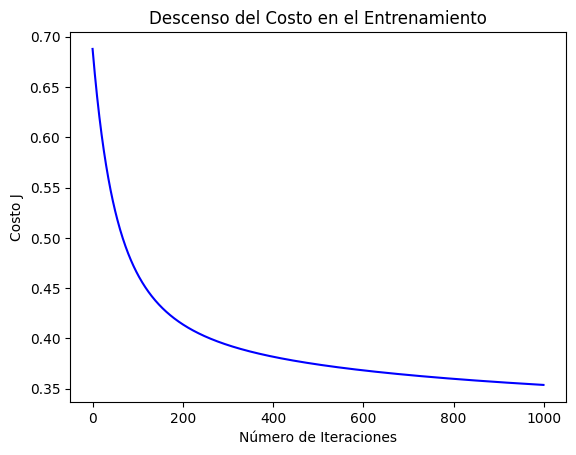

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def computeCost(X, y, theta):
    """Calcula el costo para la regresión logística"""
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -(1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    """Realiza descenso por gradiente para encontrar los parámetros óptimos theta"""
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha/m) * (X.T.dot(h - y))

        # Guardar el costo en cada iteración
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

# Ajusta los parámetros de acuerdo a tu dataset y modelo
alpha = 0.01  # Tasa de aprendizaje
num_iters = 1000 # Número de iteraciones
theta = np.zeros((X.shape[1],))  # Inicializar theta con ceros

# Llamada a la función de descenso por gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Imprimir el costo final
print("Costo final: ", J_history[-1])

# Graficar el descenso del costo
plt.plot(range(len(J_history)), J_history, color='blue')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.title('Descenso del Costo en el Entrenamiento')
plt.show()


### Obtuvimos un costo lo mas cercano a cero posible, lo cual tambien nos demuestra que nuestro modelo esta optimo.
### De esta manera concluimos con el laboratorio 4 habiendo aprendido de buena manera todo y entrenando este modelo con una precision del 62.07%